# Review Rating

There are many features that are just informative in nature. To reduce the dimentianllity let us remove such columns from the data.

In [10]:
# Run dataprocessing Notebook
%run dataprocessing.ipynb

# Select relavent features for analysis
selected_vars = ['id', 'experiences_offered',
       'transit', 'host_since', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'market', 
       'zipcode', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'square_feet', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'has_availability',
       'number_of_reviews',
       'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'requires_license', 
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture',
       'require_guest_phone_verification',
       'reviews_per_month']

In [3]:
# Load csv into dataframes
listing_df= pd.read_csv('..//data//listings.csv')

X,y = data_wrangling(listing_df,selected_vars,'review_scores_rating')


Index(['id', 'host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'square_feet', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'Facilities',
       'Host_experience'],
      dtype='object')
Index(['zipcode', 'property_type', 'room_type', 'bed_type',
       'cancellation_policy'],
      dtype='object')


In [4]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#fit the model and obtain pred response
lm_model = LinearRegression(normalize=True)
#lm_model = RandomForestRegressor(max_depth=20, n_estimators=1000,random_state=False, verbose=False)
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#append the r2 value from the test set
r2_scores_test= (r2_score(y_test, y_test_preds))
r2_scores_train= (r2_score(y_train, y_train_preds))
results= r2_score(y_test, y_test_preds)

In [5]:
print(results)

0.685070341638198


In [7]:
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
print(coef_df.head(10))


                      est_int     coefs  abs_coefs
60          zipcode_99\n98122  6.203738   6.203738
68         property_type_Dorm  3.856273   3.856273
53              zipcode_98134 -2.970945   2.970945
56              zipcode_98146  2.954164   2.954164
26        review_scores_value  2.943449   2.943449
78             bed_type_Couch -2.371812   2.371812
22  review_scores_cleanliness  1.951473   1.951473
79             bed_type_Futon -1.951060   1.951060
21     review_scores_accuracy  1.863840   1.863840
66       property_type_Chalet -1.803711   1.803711


# Results

1. Zipcode 
2. Property Type - Dorm
3. review_scores_value
4. Bed Type - couch,futon


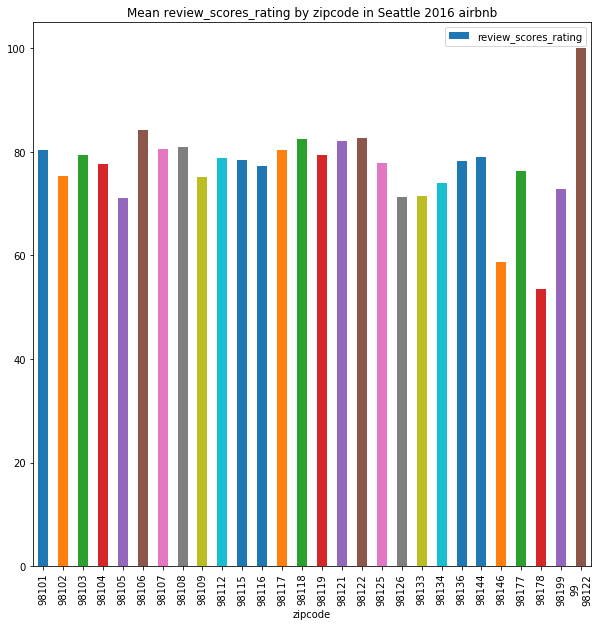

In [11]:
plot_by_target(listing_df,'zipcode','review_scores_rating')

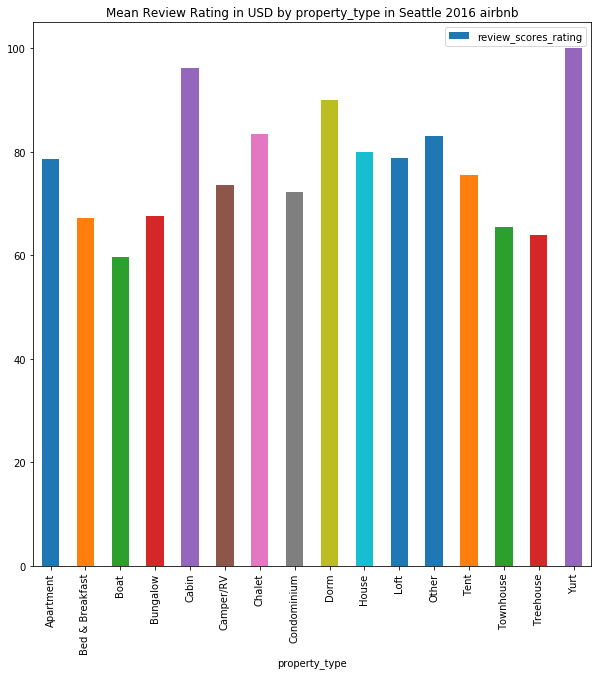

In [27]:
plot_by_target(listing_df,'property_type','review_scores_rating')

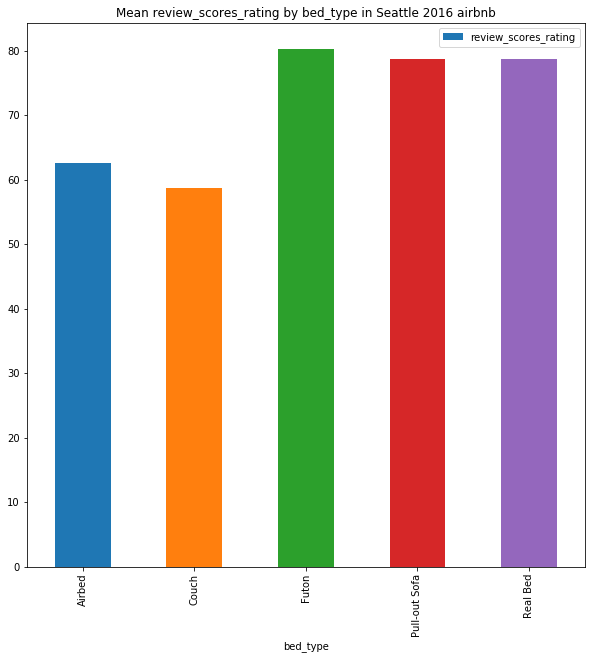

In [12]:
plot_by_target(listing_df,'bed_type','review_scores_rating')

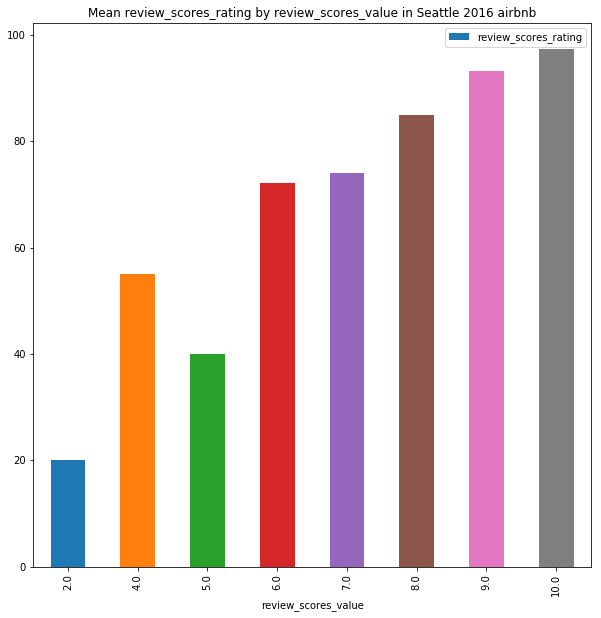

In [14]:
plot_by_target(listing_df,'review_scores_value','review_scores_rating')